In [ ]:
# スマブラー格付けチェックの正誤で分けた2群について、スマメイトレートに有意差があるか調べる

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from cliffs_delta import cliffs_delta
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 回答･レートデータ読み込み

df = pd.read_csv("df_vote_and_rate.csv", encoding="utf-8-sig")
df

,vote,tw_time,twitter_user_id,twitter_user_name,twitter_user_screen_name,twitter_user_followers_count,vote_url,is_quote,twitter_user_prof,main,delta_hours,mypage_url,smamate_rate
0,A,2021-12-29 18:12:42+09:00,995831063392829440,神祖覇天,FERoyThany,827,twitter.com/FERoyThany/status/1476118971724480512,False,SSBU: Byleth/ミラー世界最弱/最近エアライド熱再燃してます/金鹿の学級担任/アイ...,other,0,NaN,NaN
1,B,2021-12-29 18:13:25+09:00,400069662,とら(ケンタロスでした),tiger_1211,62,twitter.com/tiger_1211/status/1476119150208892930,False,某氏の動画で紹介されていた構築が公開終了されていても声掛けいただければもっかい公開します 質...,other,0,https://smashmate.net/user/59069/,NaN
2,B,2021-12-29 18:13:38+09:00,1252562177359138817,ペケ,peke_pcg,51,twitter.com/peke_pcg/status/1476119207893159942,False,PTCGO,other,0,NaN,NaN
3,A,2021-12-29 18:15:11+09:00,1109679787126087681,G&W|ヨセフ@ゲッチ,andoyosefGW,293,twitter.com/andoyosefGW/status/147611959550558...,False,スマブラ垢です\nオフラインは本当に当分厳しそう,other,0,https://smashmate.net/user/43399/,1468.0
4,B,2021-12-29 18:15:14+09:00,1344964453415043072,にそじそ,Real_Ninjin,250,twitter.com/Real_Ninjin/status/147611960732513...,False,スマブラ2000 ユナイト1850,other,0,https://smashmate.net/user/78651/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,A,2021-12-30 17:56:54+09:00,1371813202497925124,ちょん/Chon,Chon62389671,1346,twitter.com/Chon62389671/status/14764773830291...,False,ちょん鯖に入りたい人はDMまでお願いします\nピカチュウ│ホムヒカ│セフィロス│ロイ\nスマ...,other,23,https://smashmate.net/user/87154/,1622.0
1865,A,2021-12-30 17:57:27+09:00,2231279402,あこ,Ak0sandaze,950,twitter.com/Ak0sandaze/status/1476477522846306305,False,生きてます,other,23,https://smashmate.net/user/886/,1546.0
1866,B,2021-12-30 17:57:45+09:00,940477989082472448,じぇりぃ,jerry_raramagi,125,twitter.com/jerry_raramagi/status/147647759910...,False,出雲霞が好き\n\nららマジ スマブラ ウマ娘 osu! が好き\n最近は原神にドハマりして...,other,23,https://smashmate.net/user/41121/,NaN
1867,A,2021-12-30 17:58:28+09:00,2890454023,kept/Rush Gaming,FaintKept,45506,twitter.com/FaintKept/status/1476477777922891777,False,EPI主催\n\nスマブラSP日本ランク16位\nスマブラを軸に色々なことを楽しんでます\n...,other,23,https://smashmate.net/user/302/,1595.0


In [60]:
# 基本統計量を確認

(df
 [df.smamate_rate > 0]
 [["vote", "smamate_rate"]]
 .assign(smamate_rate = lambda x: x.smamate_rate.astype(int))
 .groupby("vote")
 .describe()
 .T
)

vote                          A            B
smamate_rate count   353.000000   333.000000
             mean   1548.764873  1527.921922
             std     118.165926   109.847868
             min    1253.000000  1209.000000
             25%    1470.000000  1463.000000
             50%    1524.000000  1508.000000
             75%    1608.000000  1581.000000
             max    1915.000000  1916.000000

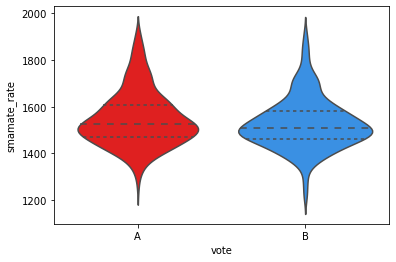

In [67]:
# 回答ごとにバイオリンプロット

sns.violinplot(x=df.vote, y=df.smamate_rate, palette=['red','dodgerblue'], inner="quartile")
plt.savefig('violinplot.png')

In [4]:
# A,Bそれぞれのレートリストを作成する

A_rates = df[(df.vote=="A") & (df.smamate_rate)]["smamate_rate"].to_list()
B_rates = df[(df.vote=="B") & (df.smamate_rate)]["smamate_rate"].to_list()

(array([  1.,  19., 111., 117.,  58.,  31.,  13.,   3.,   0.]),
 array([1200., 1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.,
        2100.]),
 <a list of 9 Patch objects>)

(array([  6.,  19., 121., 117.,  41.,  21.,   6.,   2.,   0.]),
 array([1200., 1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.,
        2100.]),
 <a list of 9 Patch objects>)

([<matplotlib.axis.XTick at 0x15414b3a190>,
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 0, 'smamate_rate')

Text(0, 0.5, 'counts')

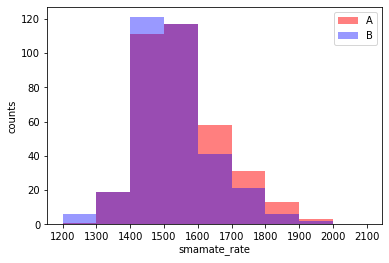

In [77]:
# 回答ごとにレートをプロット
# おおよそ同じ形状の分布をしていることを確認する

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
bins = np.linspace(1200, 2100, 10)
ax.hist(A_rates, bins=bins, color="red", alpha=0.5, label="A")
ax.hist(B_rates, bins=bins, color="blue", alpha=0.4, label="B")
plt.xticks(bins)
ax.set_xlabel('smamate_rate')
ax.set_ylabel('counts')
ax.legend(loc='upper right')
plt.savefig(f"smamate_rate.png")
plt.show()

In [120]:
# マン･ホイットニーのU検定でA投票者とB投票者の2群間のレートに有意差があるか確かめる
# 有意水準0.05、帰無仮説は｢2群間の代表値に差がない｣
# http://www.statisticslectures.com/topics/mannwhitneyu/

U,p_value = stats.mannwhitneyu(A_rates, B_rates, alternative='two-sided')

E = (len(A_rates)*len(B_rates))/2
V = math.sqrt((len(A_rates)*len(B_rates)*(len(A_rates)+len(B_rates)+1))/12)
Z = (U-E)/V #Z値
p_value
Z

# 効果量3種
Z/math.sqrt(len(A_rates+B_rates)) # https://www.ok-data.com/entry/effect-size/
cliffs_delta(A_rates, B_rates) # Cliff's Delta https://note.com/eiko_dokusho/n/ne20e3eae8d50
math.sqrt(Z**2/(Z**2+len(A_rates)+len(B_rates)-1)) #r値らしいがソース不見当 https://shimpei.fun/?p=1259

0.0318115465980475

2.1469354808595975

0.08197037756005486

(0.09476048286246587, 'negligible')

0.0817555846129869

In [7]:
# n1+n2>=100なのでZ検定も可

n1, n2 = len(A_rates), len(B_rates)
x1, x2 = sum(A_rates)/n1, sum(B_rates)/n2
v1, v2 = np.var(A_rates, ddof=1), np.var(B_rates, ddof=1)
T = (x1-x2)/math.sqrt(v1/n1 + v2/n2)
T
(x1-x2) - 1.96*math.sqrt(v1/n1 + v2/n2)
(x1-x2) + 1.96*math.sqrt(v1/n1 + v2/n2)

2.3941340987688884

3.7795024007950033

37.90639879785393